# Solution for exercise 5 and 6

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Outline for the model

In [3]:
input_size = 784
hidden_layer_size = 500
output_size = 10

# Reset any variables left in memory from previous runs. This needs to be run before changing tf variables.
tf.reset_default_graph()

# Declare placeholders where the data will be fed into.
input_layer = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])

# Weights and biases for the first linear combination between the inputs and the first hidden layer.
weight_1 = tf.get_variable('weight_1',[input_size, hidden_layer_size])
biases_1 = tf.get_variable('biases_1', [hidden_layer_size])

# Operation between the inputs and the first hidden layer.
# We've chosen Sigmoid as our activation function. You can try playing with different non-linearities. Relu will be better...
output_1 = tf.nn.relu(tf.matmul(input_layer, weight_1) + biases_1)

# Weights and biases for the second linear combination.
# This is between the first hiden layer and the output layer

# when adding new hidden layers add them here.
weight_2 = tf.get_variable('weight_2',[hidden_layer_size, hidden_layer_size])
biases_2 = tf.get_variable('biases_2', [hidden_layer_size])
output_2 = tf.nn.relu(tf.matmul(output_1, weight_2) + biases_2)

# add 3 more hidden layers
weight_3 = tf.get_variable('weight_3',[hidden_layer_size, hidden_layer_size])
biases_3 = tf.get_variable('biases_3', [hidden_layer_size])
output_3 = tf.nn.relu(tf.matmul(output_2, weight_3) + biases_3)

weight_4 = tf.get_variable('weight_4',[hidden_layer_size, hidden_layer_size])
biases_4 = tf.get_variable('biases_4', [hidden_layer_size])
output_4 = tf.nn.relu(tf.matmul(output_3, weight_4) + biases_4)

weight_5 = tf.get_variable('weight_5',[hidden_layer_size, output_size])
biases_5 = tf.get_variable('biases_5', [output_size])

# notice that we are not using an activation function for the last layer.
# the output is the preciction of our network. 
# We could use softmax activaction function here. Check next comments for reasons why not.
output = tf.matmul(output_4, weight_5) + biases_5

## Calculate model accuracy

In [4]:
# Get a 0 or 1 for every input in the batch indicating whether it output the correct answer out of the 10.
# Check the tf.argmax documentation how this works. You can also experiment by printing the values
# to visualize what is going on
out_equals_targets = tf.equal(tf.argmax(output,1), tf.argmax(targets,1))

# Accuracy of our model. Basically correct answers divided by the number of all answers.
accuracy = tf.reduce_mean(tf.cast(out_equals_targets,tf.float32))

In [5]:
# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
# This is another way to use the session. When creating a script, this is a better way. We not need an interactive session.
# Also this is faster.
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "./tmp/model.ckpt")
    print("Model restored.")
    input_batch, target_batch = mnist.test.next_batch(mnist.test._num_examples)
    test_accuracy = sess.run(accuracy,
                             feed_dict={input_layer: input_batch, targets:target_batch})

print('test accuracy: ' + str(test_accuracy))

INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt
Model restored.
test accuracy: 0.9808


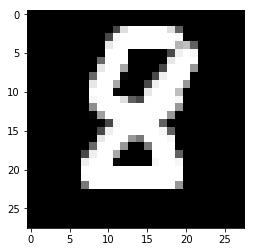

In [12]:
# Exercise 6 solution:
import matplotlib.image as mimg
import matplotlib.pyplot as plt

img = mimg.imread('number.png')

plt.imshow(img) 

new_input = img[:,:,1]

new_input = new_input.reshape((1,28*28))

In [13]:
# make the prediction
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "./tmp/model.ckpt")    
    prediction = sess.run(output,
                          feed_dict={input_layer: new_input})

print (prediction)

INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt
[[-4.6304517 -4.083046  -2.8508453  1.141166  -3.7325304 -2.5552533
  -5.435289  -5.2918825 13.51328   -0.9074751]]


In [14]:
import numpy as np
print ('Predicted number is: '+str(np.argmax(prediction,1)))

Predicted number is: [8]
